# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Sendhy Maula Ammarulloh
- **Email:** A595YBM451@devacademy.id
- **ID Dicoding:** A595YBM451

## Menentukan Pertanyaan Bisnis

- Bagaimana tren perubahan kualitas udara (PM2.5 dan PM10) di berbagai stasiun pemantauan dari tahun ke tahun?
- Bagaimana pengaruh faktor cuaca terhadap tingkat polusi udara di suatu lokasi?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
#Cek Versi Library Pandas
pd.__version__

'2.2.2'

In [ ]:
#Cek Versi Numpy Pandas
np.__version__

'1.26.4'

In [ ]:
#Cek Versi Matplotlib Pandas
plt.matplotlib.__version__

'3.10.0'

In [ ]:
#Cek Versi Seaborn Pandas
sns.__version__

'0.13.2'

## Data Wrangling

### Gathering Data

In [ ]:
# Mencari semua file CSV dalam direktori
files = glob.glob("/content/*.csv")

# Membaca semua file dan menggabungkan menjadi satu DataFrame
df_list = [pd.read_csv(file) for file in files]
df = pd.concat(df_list, ignore_index=True)

# Menampilkan 5 baris pertama
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [ ]:
# Menampilkan 5 baris terakhir
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420763,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
420764,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
420765,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan
420766,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan
420767,35064,2017,2,28,23,10.0,28.0,7.0,48.0,600.0,39.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Nongzhanguan


**Insight:**
- Dataset ini sangat kaya untuk analisis tren polusi udara berdasarkan waktu dan lokasi.
- Terdapat hubungan potensial antara polutan udara dan faktor cuaca yang dapat dianalisis lebih lanjut.
- Bisa dilakukan eksplorasi lebih lanjut untuk melihat musim, tren tahunan, atau pola harian dari polusi udara di berbagai stasiun.
- Langkah selanjutnya: Bisa dilakukan visualisasi tren waktu dan analisis korelasi untuk menggali lebih dalam pola yang ada!

### Assessing Data

In [ ]:
# Mengecek informasi dasar dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [ ]:
# Mengecek jumlah missing values
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [ ]:
# Mengecek nilai unik di kolom 'station'
df['station'].unique()

array(['Changping', 'Aotizhongxin', 'Dongsi', 'Wanliu', 'Dingling',
       'Tiantan', 'Huairou', 'Shunyi', 'Gucheng', 'Guanyuan',
       'Wanshouxigong', 'Nongzhanguan'], dtype=object)

**Insight:**
- Dataset memiliki 420768 jumlah baris dan 18 jumlah kolom dengan tipe data yang bervariasi (numerik, kategori, datetime, dll).
- Terdapat beberapa kolom dengan missing values
- Dataset mencakup 12 stasiun pemantauan berbeda, seperti Aotizhongxin, Changping, dll.

### Cleaning Data

In [ ]:
# Menggabungkan kolom year, month, day, hour menjadi satu kolom datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

In [ ]:
# Menghapus kolom yang tidak dibutuhkan
df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

In [ ]:
# Menampilkan Dataframe
df

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,2,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,3,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,4,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,5,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan,2017-02-28 19:00:00
420764,35061,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan,2017-02-28 20:00:00
420765,35062,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan,2017-02-28 21:00:00
420766,35063,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan,2017-02-28 22:00:00


In [ ]:
# Menggunakan interpolasi linier untuk data numerik
df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']] = \
    df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].interpolate(method='linear')

In [ ]:
# Mengisi nilai kosong (missing values) pada kolom 'wd' (arah angin) dengan modus (nilai yang paling sering muncul)
df['wd'].fillna(df['wd'].mode()[0], inplace=True)

<ipython-input-15-b1c037203158>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wd'].fillna(df['wd'].mode()[0], inplace=True)


In [ ]:
# Mengecek total jumlah missing values dalam dataset setelah proses pengisian
print(df.isnull().sum().sum())  # Harus 0 jika semua nilai sudah diisi

0


**Insight:**
- Dataset kini memiliki kolom 'datetime' yang menyimpan informasi waktu dalam format yang lebih praktis.
- Semua nilai numerik yang hilang telah diisi menggunakan interpolasi linier dan kolom kategorikal diisi dengan modus (nilai yang paling sering muncul)
- Dari `df.isnull().sum().sum()` yang menghasilkan 0, artinya tidak ada missing values di dalam dataset setelah proses interpolasi dan imputasi.

## Exploratory Data Analysis (EDA)

### Explore Statistik Deskriptif

In [ ]:
# Menampilkan statistik deskriptif untuk kolom numerik dalam dataframe
df.describe()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768
mean,17532.500000,79.839718,104.910268,15.913090,50.599906,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034,2015-03-01 11:30:00.000001024
min,1.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,17532.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000,2015-03-01 11:30:00
75%,26298.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,35064.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10122.116943,80.950217,92.431422,21.896609,35.171069,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674,NaN


In [ ]:
# Menampilkan statistik deskriptif untuk kolom bertipe objek (kategori/string)
df.describe(include='object')

,wd,station
count,420768,420768
unique,16,12
top,NE,Changping
freq,45157,35064


### Exlpore Konsentrasi Polusi Udara di Berbagai Stasiun

In [ ]:
# Menghitung rata-rata nilai PM2.5 dan PM10 untuk setiap stasiun pemantauan
df.groupby('station')[['PM2.5', 'PM10']].mean().sort_values(by='PM2.5', ascending=False)

,PM2.5,PM10
station,,
Dongsi,86.144243,110.347617
Nongzhanguan,85.079472,109.384022
Wanshouxigong,85.067548,112.505795
Gucheng,84.074802,119.261567
Wanliu,83.467612,110.707858
Guanyuan,82.897522,109.372349
Aotizhongxin,82.540623,110.210033
Tiantan,82.033097,106.537076
Shunyi,79.437962,99.271936


### Explore Polusi Udara Berdasarkan Waktu (Harian, Bulanan, Tahunan)

In [ ]:
# Menambahkan kolom 'year' dengan mengekstrak tahun dari kolom 'datetime'
df['year'] = df['datetime'].dt.year

# Menghitung rata-rata PM2.5 dan PM10 untuk setiap tahun
df.groupby('year')[['PM2.5', 'PM10']].mean()

,PM2.5,PM10
year,,
2013,79.768553,103.199397
2014,86.183671,116.821115
2015,79.306423,103.655023
2016,72.078419,94.751717
2017,92.407898,110.880797


In [ ]:
# Menambahkan kolom 'month' dengan mengekstrak bulan dari kolom 'datetime'
df['month'] = df['datetime'].dt.month

# Menghitung rata-rata PM2.5 dan PM10 untuk setiap bulan
df.groupby('month')[['PM2.5', 'PM10']].mean()

,PM2.5,PM10
month,,
1,93.760559,113.402751
2,89.213391,104.625065
3,94.594295,136.718417
4,73.367153,117.304974
5,63.541148,108.480401
6,68.837547,86.613679
7,71.401115,84.700310
8,53.465479,71.464460
9,61.281071,79.481882


**Insight:**
- PM2.5 memiliki rata-rata sekitar 79.839718 dengan nilai maksimum 999.000000 dan kolom 'wd' (arah angin) memiliki variasi 16 nilai unik.
- Stasiun Dongsi memiliki rata-rata PM2.5 tertinggi dan stasiun Dingling memiliki rata-rata PM2.5 terendah.
- Kita melihat tren polusi dari tahun ke tahun, dimana tahun 2017 adalah yang tertinggi.
- PM2.5 dan PM10 cenderung lebih tinggi pada bulan desember dan lebih rendah pada bulan agustus.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

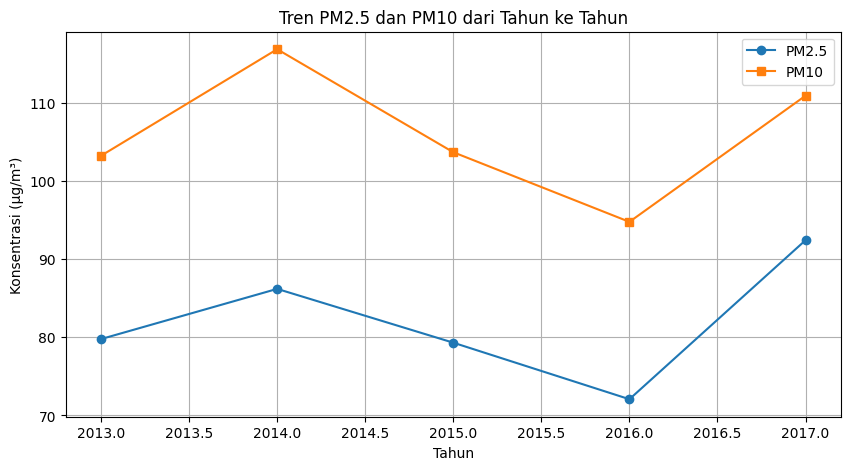

In [ ]:
# Mengelompokkan data berdasarkan tahun
df['year'] = df['datetime'].dt.year
pm_trend = df.groupby('year')[['PM2.5', 'PM10']].mean()

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(pm_trend.index, pm_trend['PM2.5'], marker='o', label='PM2.5')
plt.plot(pm_trend.index, pm_trend['PM10'], marker='s', label='PM10')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi (µg/m³)')
plt.title('Tren PM2.5 dan PM10 dari Tahun ke Tahun')
plt.legend()
plt.grid()
plt.show()

### Pertanyaan 2:

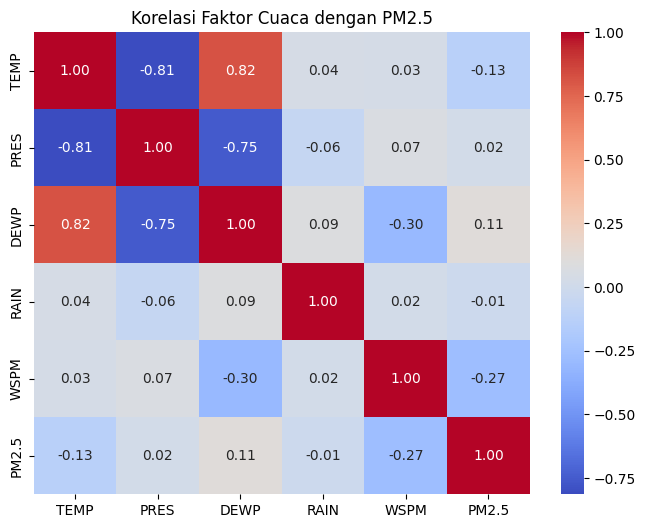

In [ ]:
# Korelasi antara PM2.5 dengan faktor cuaca
weather_factors = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'PM2.5']
correlation_matrix = df[weather_factors].corr()

# Visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Faktor Cuaca dengan PM2.5")
plt.show()

**Insight:**
- Tingkat polusi udara mengalami fluktuasi signifikan, dengan PM2.5 tertinggi pada 2014 dan PM10 tertinggi pada 2017, menunjukkan pengaruh faktor lingkungan dan aktivitas manusia yang dinamis.
- Kecepatan angin berperan paling signifikan dalam menurunkan PM2.5, sementara suhu dan kelembaban memiliki pengaruh kecil, serta hujan dan tekanan udara tidak berdampak besar terhadap polusi udara.

## Analisis Lanjutan (Clustering)

In [ ]:
# Menentukan batasan kuantil untuk clustering PM2.5
# Kita menggunakan kuantil 33% dan 66% sebagai batasan kategori

low_threshold = df['PM2.5'].quantile(0.33)  # Ambil nilai PM2.5 di persentil 33 (batas bawah kategori "Baik")
high_threshold = df['PM2.5'].quantile(0.66)  # Ambil nilai PM2.5 di persentil 66 (batas atas kategori "Sedang")

# Menampilkan batasan kategori berdasarkan nilai kuantil yang telah dihitung
print(f"Batas PM2.5 kategori Baik: < {low_threshold}")  # Kategori "Baik" jika PM2.5 di bawah batas ini
print(f"Batas PM2.5 kategori Sedang: {low_threshold} - {high_threshold}")  # Kategori "Sedang" jika PM2.5 di antara dua batas ini
print(f"Batas PM2.5 kategori Buruk: > {high_threshold}")  # Kategori "Buruk" jika PM2.5 di atas batas ini

Batas PM2.5 kategori Baik: < 30.0
Batas PM2.5 kategori Sedang: 30.0 - 87.0
Batas PM2.5 kategori Buruk: > 87.0


In [ ]:
# Fungsi untuk mengklasifikasikan kualitas udara berdasarkan nilai PM2.5
def classify_air_quality(pm_value):
    if pm_value < low_threshold:  # Jika nilai PM2.5 lebih kecil dari batas bawah (low_threshold)
        return 'Baik'  # Kategori "Baik"
    elif low_threshold <= pm_value <= high_threshold:  # Jika nilai PM2.5 berada di antara low_threshold dan high_threshold
        return 'Sedang'  # Kategori "Sedang"
    else:  # Jika nilai PM2.5 lebih besar dari high_threshold
        return 'Buruk'  # Kategori "Buruk"

# Terapkan fungsi classify_air_quality ke setiap nilai PM2.5 dalam DataFrame
df['Cluster'] = df['PM2.5'].apply(classify_air_quality)

# Menampilkan jumlah data dalam setiap kategori (Baik, Sedang, Buruk)
print(df['Cluster'].value_counts())

Cluster
Buruk     141278
Sedang    141255
Baik      138235
Name: count, dtype: int64


<ipython-input-26-f8726218b10e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Cluster'], palette={'Baik': 'green', 'Sedang': 'orange', 'Buruk': 'red'})


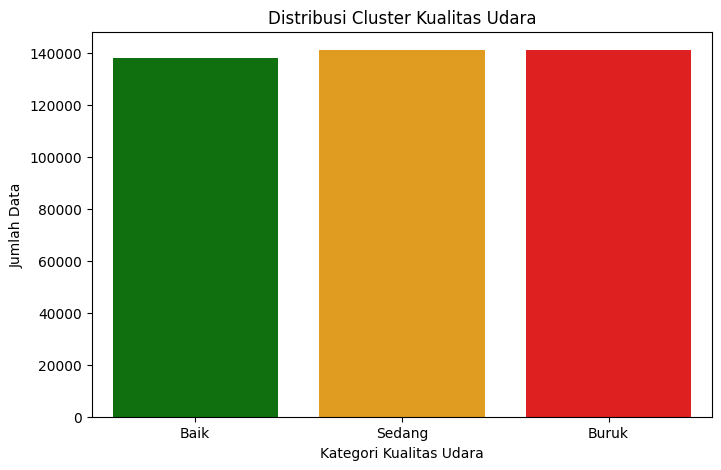

In [ ]:
# Menentukan ukuran figure untuk plot
plt.figure(figsize=(8, 5))

# Membuat countplot untuk melihat distribusi kategori kualitas udara
# Menggunakan warna khusus: 'Baik' (hijau), 'Sedang' (oranye), dan 'Buruk' (merah)
sns.countplot(x=df['Cluster'], palette={'Baik': 'green', 'Sedang': 'orange', 'Buruk': 'red'})

# Menambahkan label sumbu X
plt.xlabel('Kategori Kualitas Udara')

# Menambahkan label sumbu Y
plt.ylabel('Jumlah Data')

# Menambahkan judul pada plot
plt.title('Distribusi Cluster Kualitas Udara')

# Menampilkan plot
plt.show()

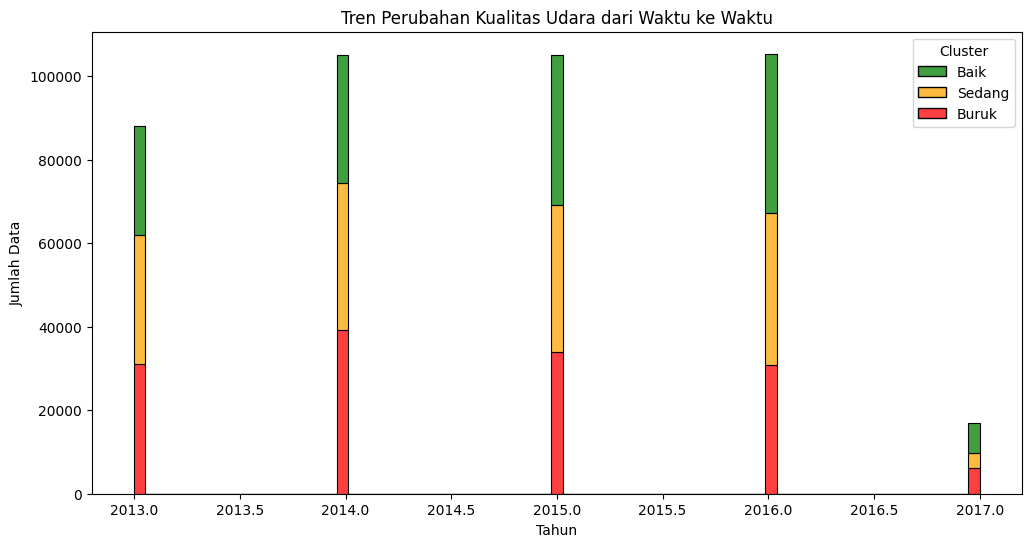

In [ ]:
# Menentukan ukuran figure untuk plot
plt.figure(figsize=(12, 6))

# Membuat histogram untuk melihat distribusi jumlah data berdasarkan tahun
# Data dikelompokkan berdasarkan kategori 'Cluster' dengan warna berbeda
sns.histplot(df, x='year', hue='Cluster', multiple='stack',
             palette={'Baik': 'green', 'Sedang': 'orange', 'Buruk': 'red'})

# Menambahkan label sumbu X
plt.xlabel('Tahun')

# Menambahkan label sumbu Y
plt.ylabel('Jumlah Data')

# Menambahkan judul pada plot
plt.title('Tren Perubahan Kualitas Udara dari Waktu ke Waktu')

# Menampilkan plot
plt.show()

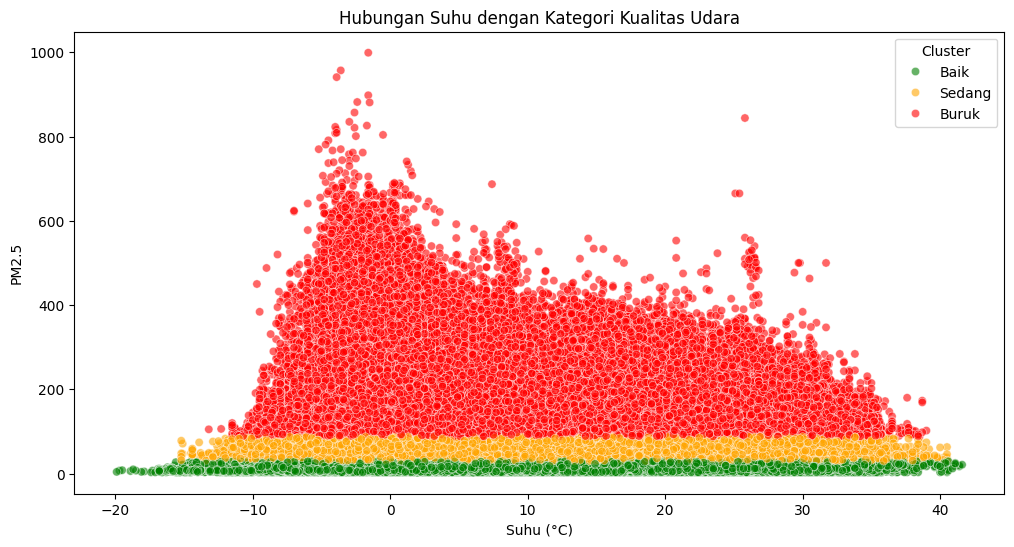

In [ ]:
# Menentukan ukuran figure untuk plot
plt.figure(figsize=(12, 6))

# Membuat scatter plot untuk melihat hubungan antara suhu (TEMP) dan kadar PM2.5
# Data dikelompokkan berdasarkan kategori 'Cluster' dengan warna berbeda
# Alpha 0.6 digunakan untuk membuat titik lebih transparan sehingga pola lebih mudah terlihat
sns.scatterplot(x=df['TEMP'], y=df['PM2.5'], hue=df['Cluster'],
                palette={'Baik': 'green', 'Sedang': 'orange', 'Buruk': 'red'}, alpha=0.6)

# Menambahkan label sumbu X
plt.xlabel('Suhu (°C)')

# Menambahkan label sumbu Y
plt.ylabel('PM2.5')

# Menambahkan judul pada plot
plt.title('Hubungan Suhu dengan Kategori Kualitas Udara')

# Menampilkan plot
plt.show()

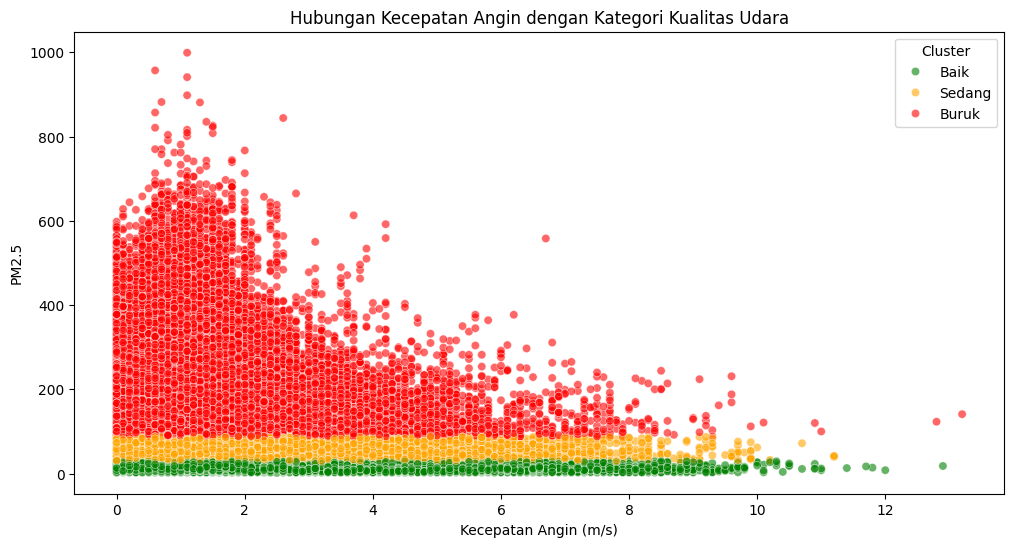

In [ ]:
# Menentukan ukuran figure untuk plot
plt.figure(figsize=(12, 6))

# Membuat scatter plot untuk melihat hubungan antara kecepatan angin (WSPM) dan kadar PM2.5
# Data dikelompokkan berdasarkan kategori 'Cluster' dengan warna berbeda
# Alpha 0.6 digunakan untuk membuat titik lebih transparan sehingga pola lebih mudah terlihat
sns.scatterplot(x=df['WSPM'], y=df['PM2.5'], hue=df['Cluster'],
                palette={'Baik': 'green', 'Sedang': 'orange', 'Buruk': 'red'}, alpha=0.6)

# Menambahkan label sumbu X
plt.xlabel('Kecepatan Angin (m/s)')

# Menambahkan label sumbu Y
plt.ylabel('PM2.5')

# Menambahkan judul pada plot
plt.title('Hubungan Kecepatan Angin dengan Kategori Kualitas Udara')

# Menampilkan plot
plt.show()

## Conclusion

- Tren perubahan kualitas udara (PM2.5 dan PM10) menunjukkan fluktuasi signifikan dari tahun ke tahun, dengan PM2.5 tertinggi pada 2014 dan PM10 tertinggi pada 2017, serta keduanya mencapai level terendah pada 2016. Perubahan ini mengindikasikan bahwa faktor eksternal seperti kebijakan lingkungan, aktivitas industri, dan kondisi cuaca berperan dalam menentukan kualitas udara, sehingga perlu dilakukan pemantauan dan evaluasi kebijakan secara berkala untuk mengurangi polusi udara.
- Faktor cuaca memiliki pengaruh terhadap tingkat polusi udara, di mana kecepatan angin berperan paling signifikan dalam menurunkan PM2.5, sementara suhu dan kelembaban memiliki dampak kecil. Hujan dan tekanan udara tidak menunjukkan korelasi kuat terhadap polusi, namun efeknya bisa berbeda tergantung musim atau wilayah tertentu. Oleh karena itu, strategi pengendalian polusi perlu mempertimbangkan pola cuaca agar lebih efektif dalam menjaga kualitas udara yang lebih baik.